In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train = pd.read_csv(r'D:\Data Science\Credit card lead prediction\train.csv')
test = pd.read_csv(r'D:\Data Science\Credit card lead prediction\test.csv')

In [42]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [43]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


---

### Hypothesis

In [44]:
# 1. Credit_Prodct, Is_Active and Vintage might be the most important columns.
# 2. Certain Channel_Code might attract more customers.
# 3. Salaried customer might be most interested.

In [45]:
train.shape

(245725, 11)

In [46]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


In [47]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

<AxesSubplot:ylabel='Is_Lead'>

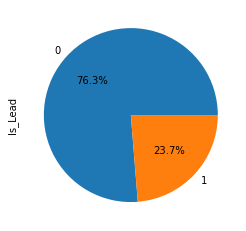

In [48]:
id = 'ID'
target = 'Is_Lead'

features = [col for col in train.columns if col not in [id, target]]

train[target].value_counts().plot.pie(autopct = '%1.1f%%')

In [49]:
num_cols = ['Age', 'Vintage', 'Avg_Account_Balance']
cat_cols = [col for col in features if col not in num_cols]

In [50]:
cat_cols
num_cols

['Age', 'Vintage', 'Avg_Account_Balance']

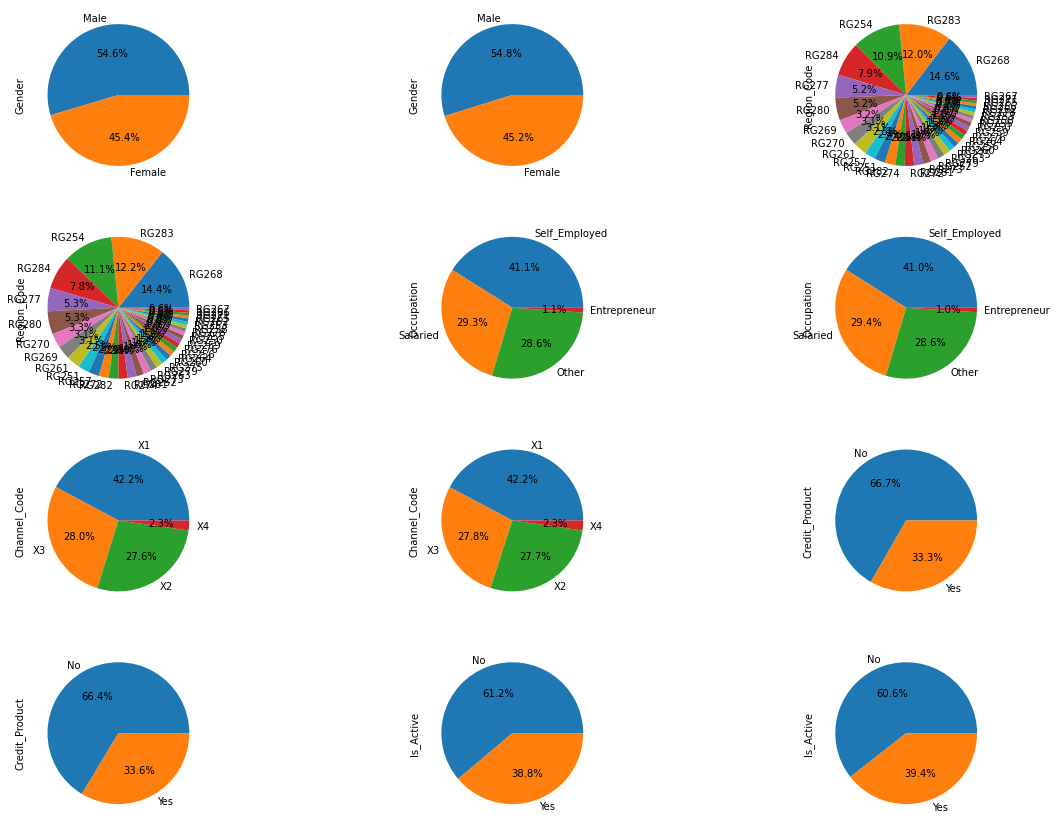

In [69]:
f, ax = plt.subplots(4,3, figsize = (20,15))
axx = ax.flatten()
index = 0

for col in cat_cols:
    train[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])
    index+=1
    test[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])
    index+=1

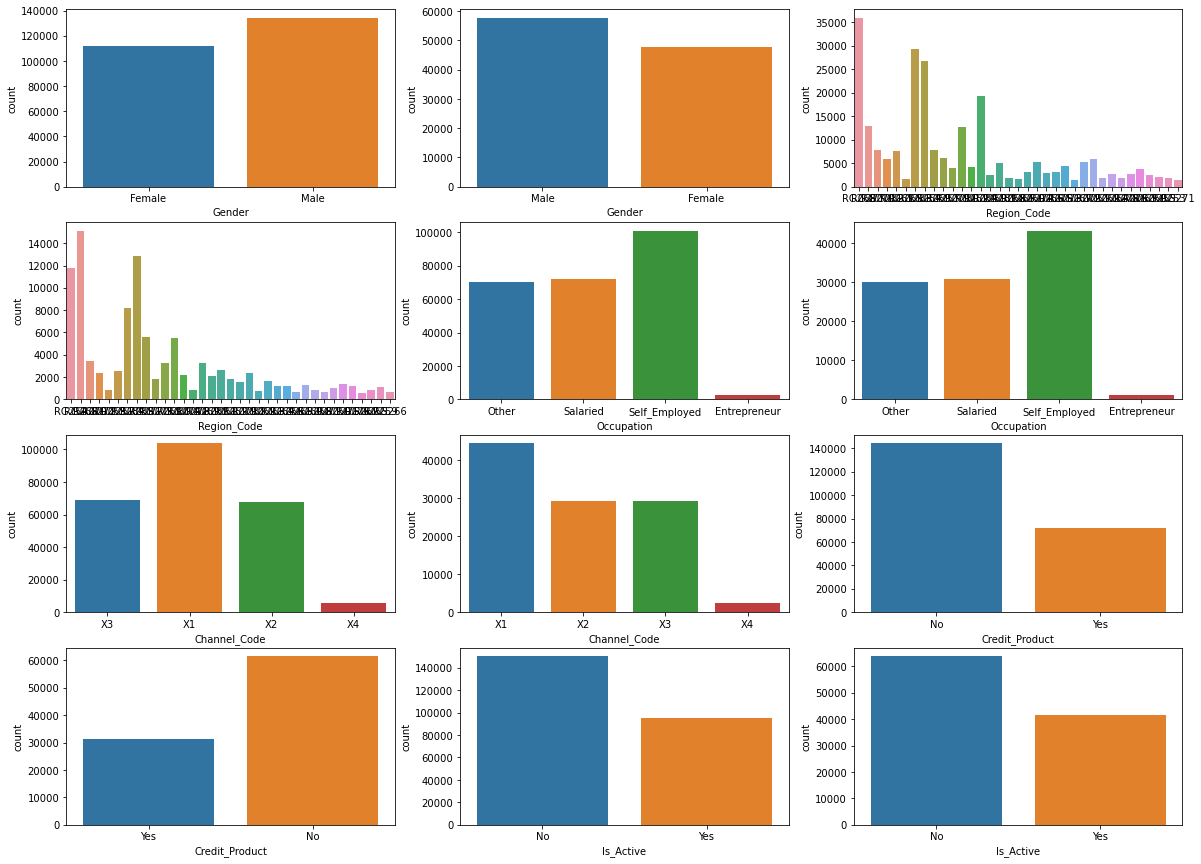

In [78]:
f, ax = plt.subplots(4,3, figsize = (20,15))
axx = ax.flatten()
index = 0

for col in cat_cols:
    sns.countplot(data = train, x = col, ax = axx[index])
    #plt.xticks(rotation = 90)
    index+=1
    sns.countplot(data = test, x = col, ax = axx[index])
    #plt.xticks(rotation = 90)
    index+=1
    

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

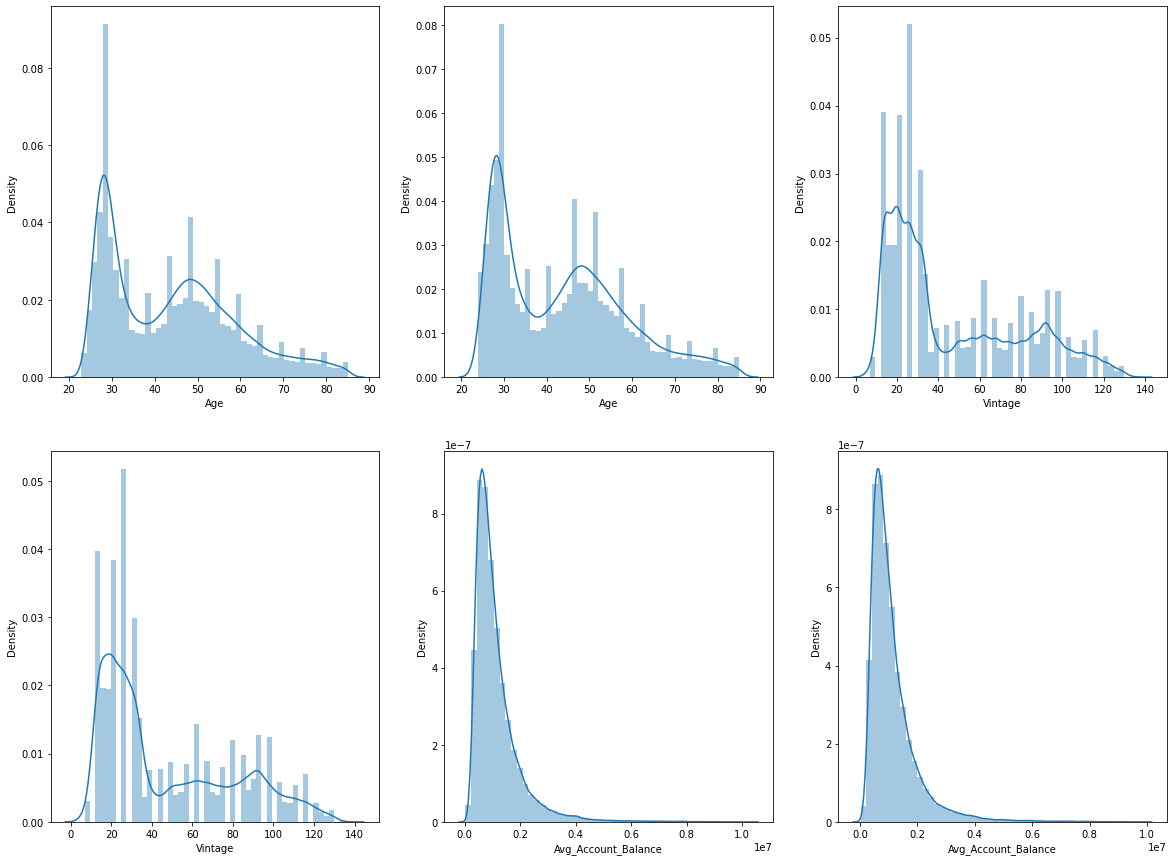

In [85]:
f, ax = plt.subplots(2,3, figsize = (20,15))
axx = ax.flatten()
index = 0

for col in num_cols:
    sns.distplot(train[col], ax = axx[index])
    index +=1
    sns.distplot(test[col], ax = axx[index])
    index +=1
    
    

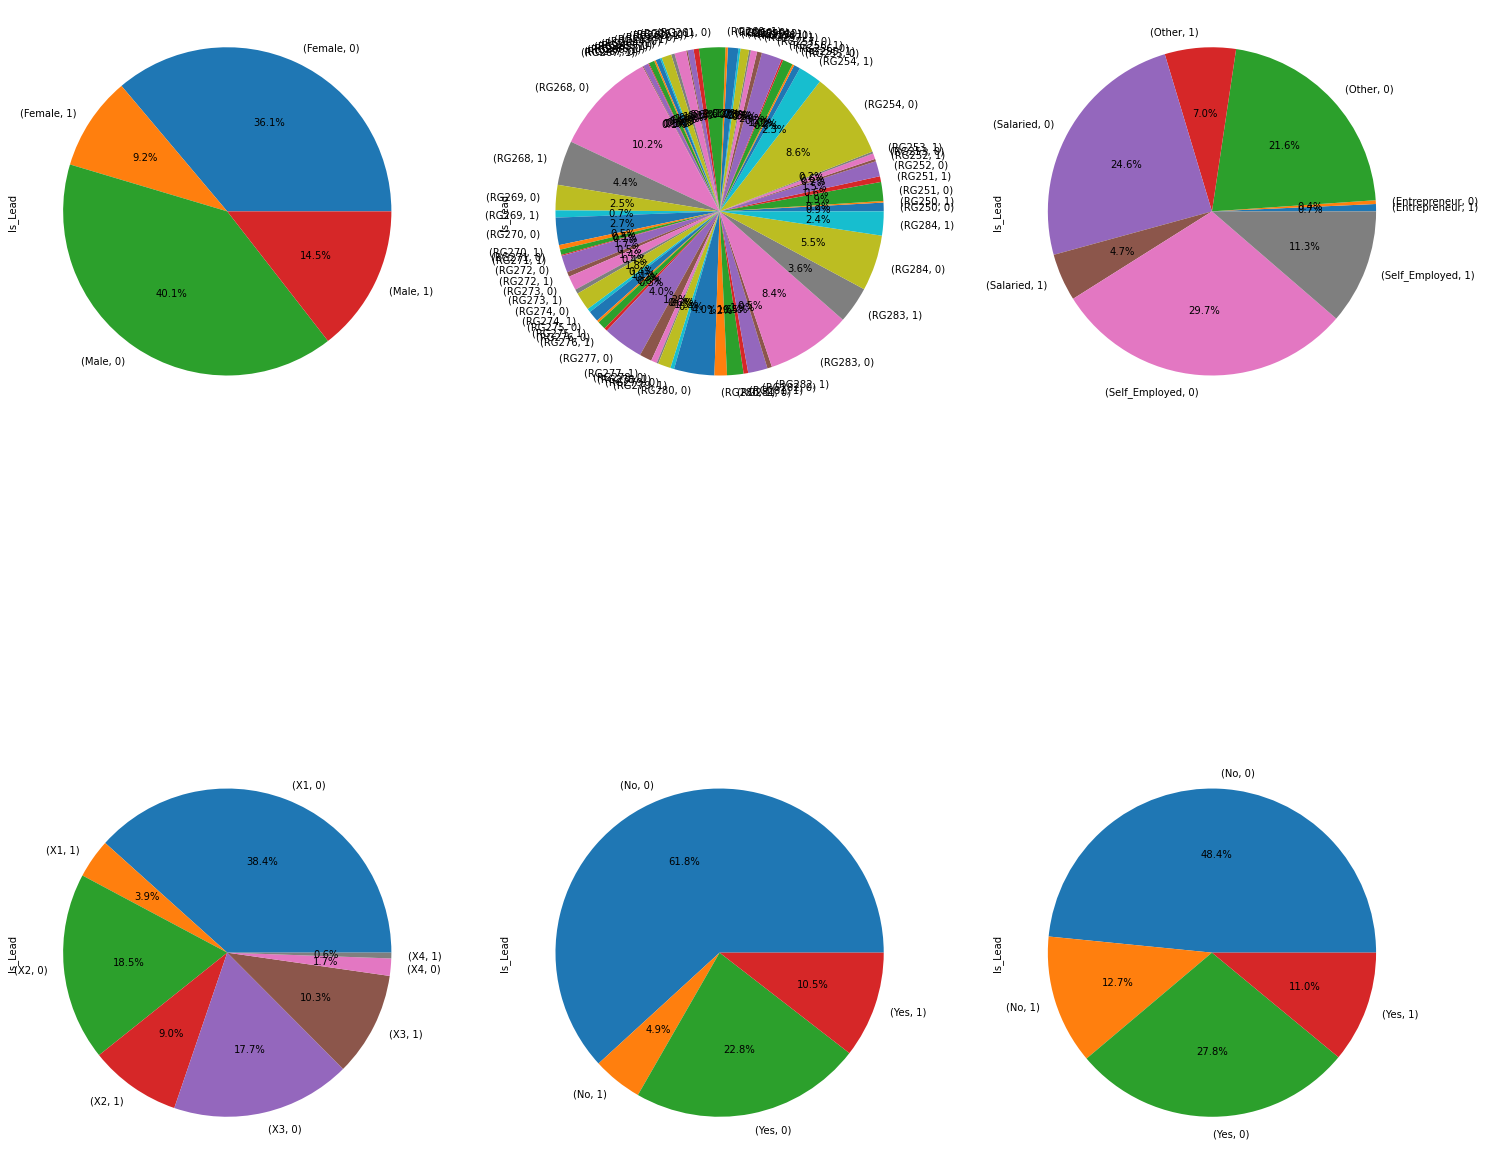

In [89]:
f, ax = plt.subplots(2,3, figsize = (25,25))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    train.groupby(col)[target'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-p

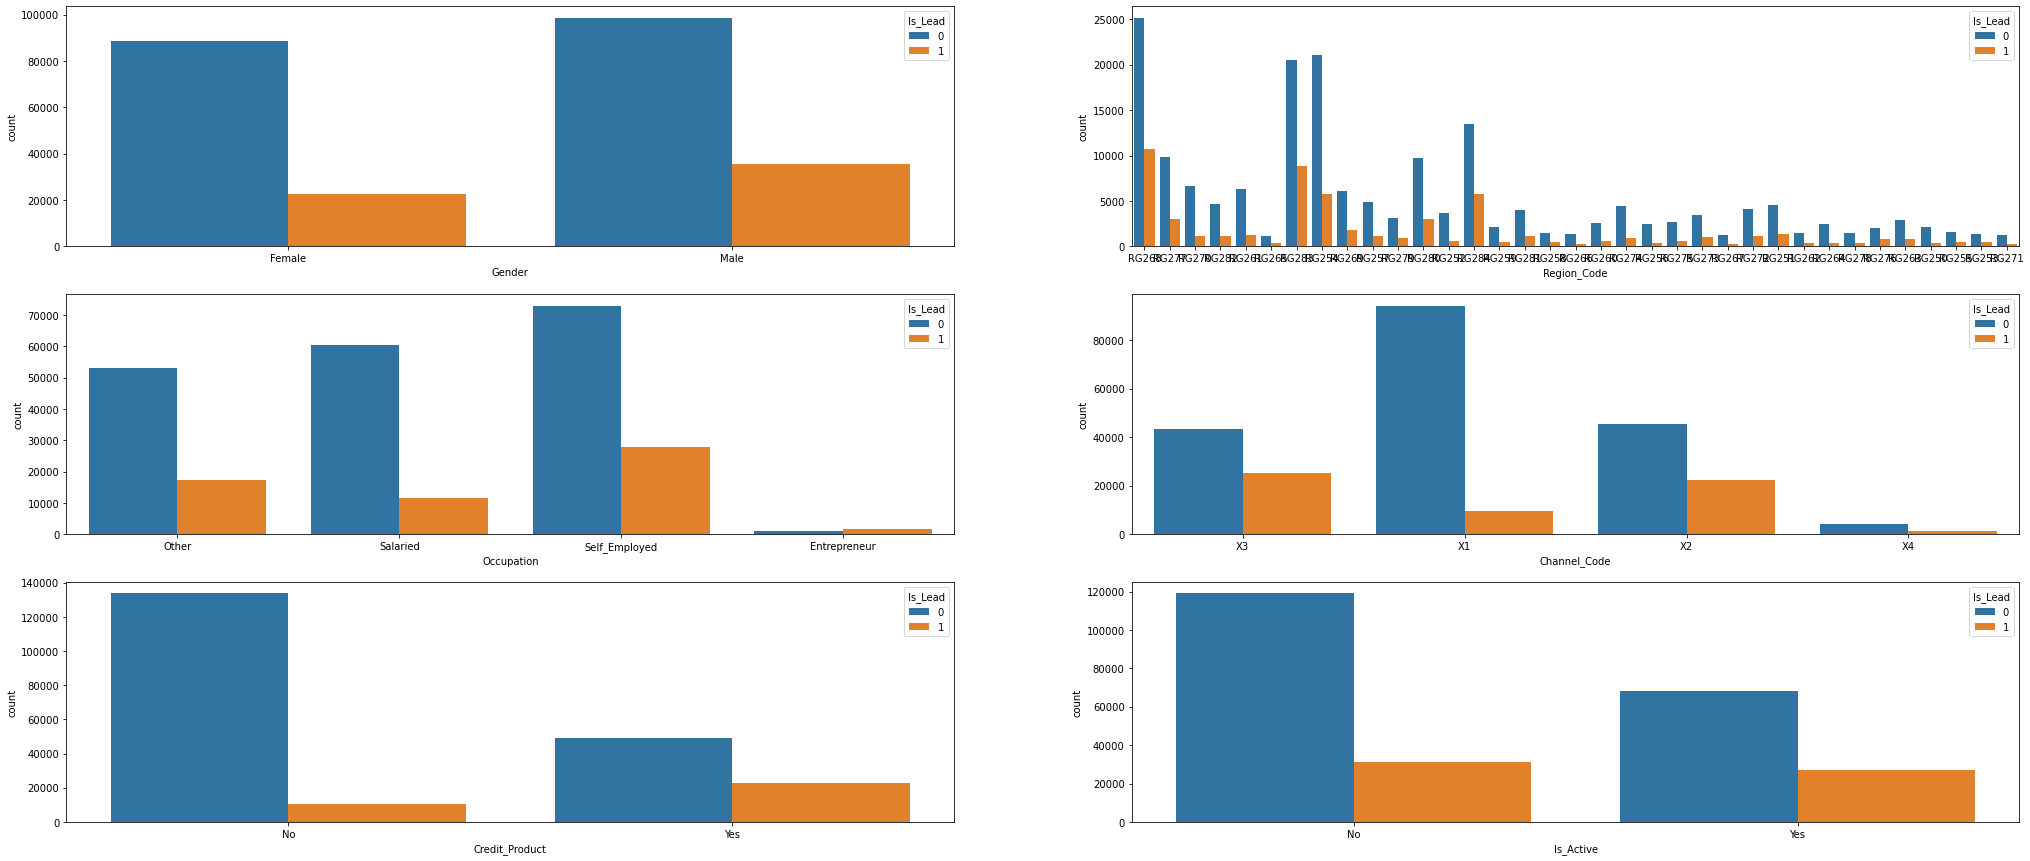

In [82]:
f, ax = plt.subplots(3,2, figsize = (35,15))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.countplot(train[col],ax = axx[index], hue = train[target])

In [92]:
# 1. Entrepreneurs are very likley to subscribe.
# 2. If the customer is already using a credit product then they are likely to subscribe.
# 3. If the customer is active then is more likley to subscribe.
# 4. Channel code x1 is less likley to get customers subscribe and X2 and X3 are more likely to subscribe.

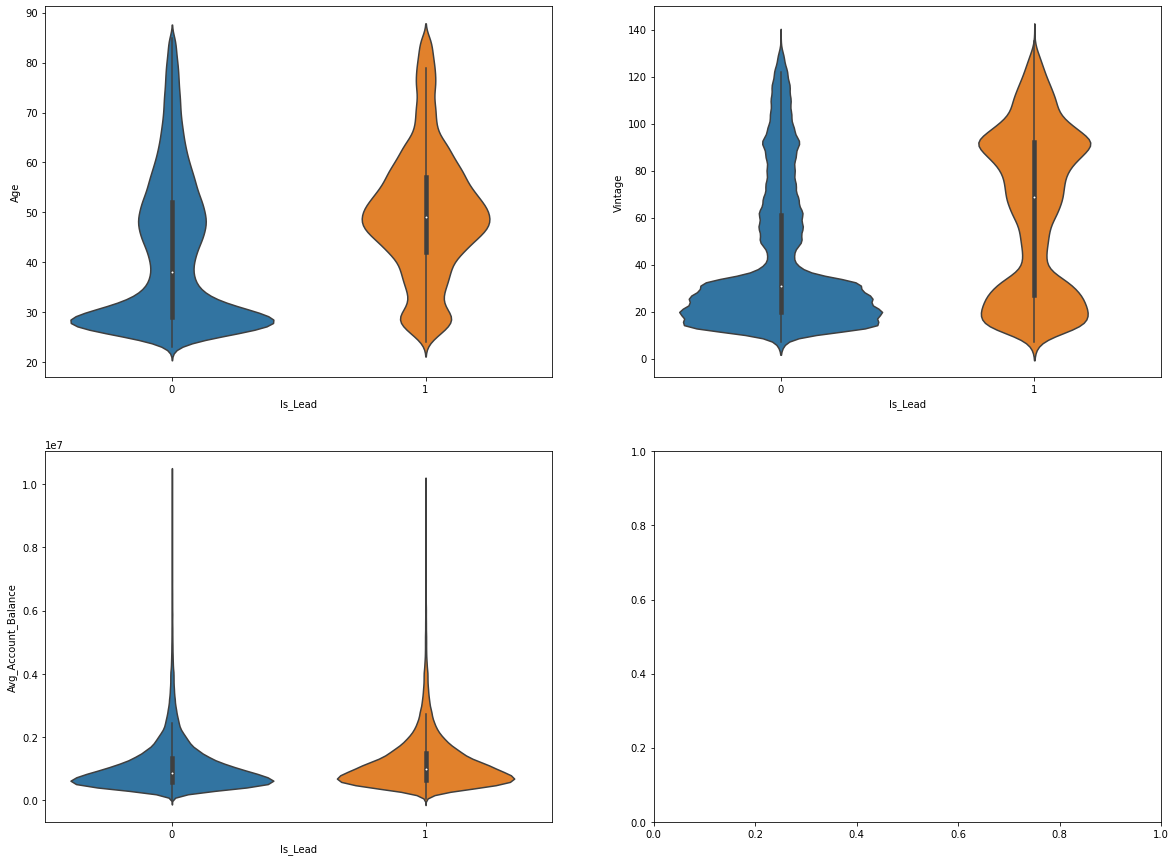

In [219]:
f, ax = plt.subplots(2,2, figsize = (20,15))
axx = ax.flatten()
index = 0

for col in num_cols:
    sns.violinplot(x = train[target],y = train[col], ax = axx[index])
    index +=1

<AxesSubplot:ylabel='Is_Lead'>

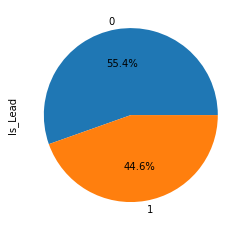

In [224]:
high_vintage = train[train['Vintage']> 70]

high_vintage[target].value_counts().plot.pie(autopct = '%1.1f%%')

In [102]:
# 1. Vintage customers are more likely to subscribe.
# 2. Older customers are more likely to subscribe.

---

<AxesSubplot:xlabel='Credit_Product', ylabel='Vintage'>

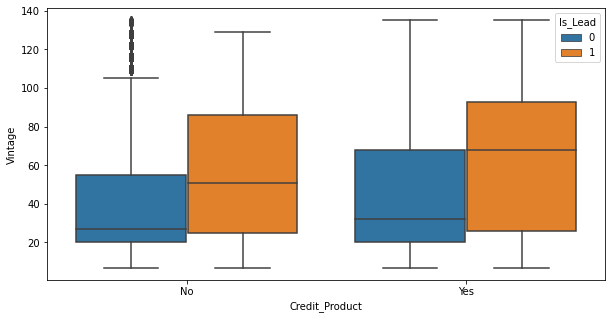

In [109]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'Credit_Product', y = 'Vintage', hue = 'Is_Lead')

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

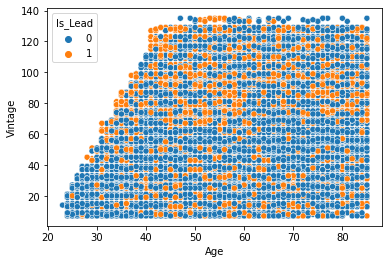

In [110]:
sns.scatterplot(data = train, x = 'Age', y = 'Vintage', hue = 'Is_Lead')

In [108]:
young = train[train['Vintage'] <= 40]

In [116]:
young.groupby('Occupation')[target].value_counts()

Occupation     Is_Lead
Entrepreneur   1            322
               0            303
Other          0          28317
               1           4159
Salaried       0          60268
               1           7408
Self_Employed  0          33924
               1           8922
Name: Is_Lead, dtype: int64

In [118]:
middle = train[(train['Vintage'] >= 40) & (train['Vintage'] <= 80)]

In [119]:
middle.groupby('Occupation')[target].value_counts()

Occupation     Is_Lead
Entrepreneur   1            499
               0            331
Other          0          13093
               1           4433
Salaried       1           1543
               0            215
Self_Employed  0          23022
               1           7558
Name: Is_Lead, dtype: int64

In [ ]:
entre +((())) middle+ old  salaried)

In [114]:
old = train[train['Vintage'] > 80]

In [120]:
old.groupby('Occupation')[target].value_counts()

Occupation     Is_Lead
Entrepreneur   1            941
               0            271
Other          0          11574
               1           8597
Salaried       1           2545
               0             20
Self_Employed  0          16099
               1          11361
Name: Is_Lead, dtype: int64

In [92]:
old[target].value_counts()

0    24106
1    10492
Name: Is_Lead, dtype: int64

In [9]:
# train[(train['Channel_Code'] == 'X2')].groupby('Gender')[target].value_counts()

In [180]:
vinage = train[(train['Age'] < 30) & (train['Vintage'] < 30)]
vinage1 = train[(train['Age'] < 60) & (train['Vintage'] > 80)]
vinage2 = train[(train['Age'] > 72) & (train['Age'] < 79) & (train['Vintage'] > 70) & (train['Vintage'] < 90)]

<AxesSubplot:ylabel='Is_Lead'>

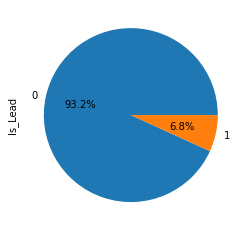

In [154]:
vinage[target].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='Is_Lead'>

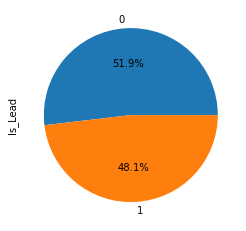

In [155]:
vinage1[target].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='Is_Lead'>

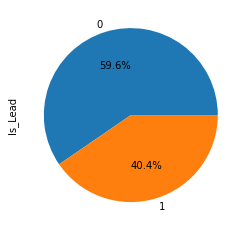

In [186]:
vinage2[target].value_counts().plot.pie(autopct = '%1.1f%%')

In [185]:
vinage2[target].value_counts()

0    806
1    547
Name: Is_Lead, dtype: int64

In [158]:
vinage1[target].value_counts()

0    17789
1    16514
Name: Is_Lead, dtype: int64

In [215]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train[['Gender', 'Credit_Product', 'Is_Active','Occupation', 'Channel_Code', 'Region_Code']] = train[['Gender', 'Credit_Product', 'Is_Active','Occupation', 'Channel_Code', 'Region_Code']].apply(le.fit_transform)

In [216]:
# train.groupby('Credit_Product')['Is_Active'].value_counts().plot.pie(autopct = '%1.1f%%')

In [217]:
# train.groupby('Credit_Product')['Is_Active'].value_counts()

<AxesSubplot:>

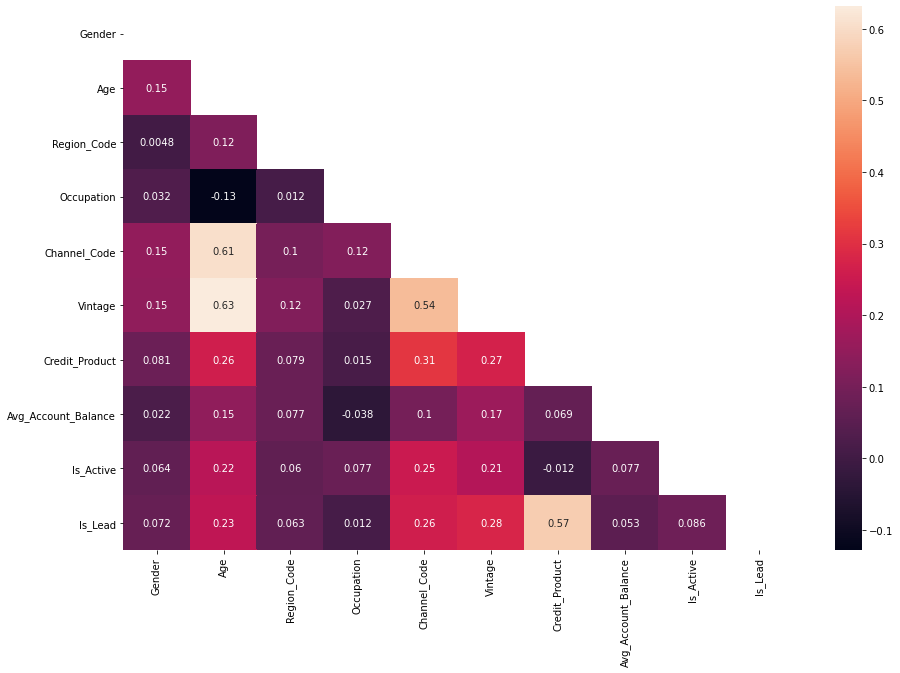

In [218]:
plt.figure(figsize = (15,10))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True)

In [197]:
train.groupby('Channel_Code')['Is_Lead'].value_counts()

Channel_Code  Is_Lead
X1            0          94236
              1           9482
X2            0          45519
              1          22207
X3            0          43493
              1          25219
X4            0           4189
              1           1380
Name: Is_Lead, dtype: int64

In [ ]:
# Best and worst regions 
# region and occupation , entrepreneur log kisi specific region se ho sakte hai 
# self employed log jo active hai , other occupation wale jo active hai
# aise log jo active bhi hai aur credit product bhi hai 
# budhelog jo subscribe kar rhe hai unka sex distribution
# young salaried log jo active nahi hai aur unke paas credit product bhi nahi hai 
# x3 aur x2 me jo log hai unka demographic kaisa hai (occupation, sex,region wagera)
# aise kaunse entrepreneurs hai jo credit subscribe nahi karrahe, check difference between parameters of entrepreneurs that subscribe and the ones that dont ,  DO THIS FOR EVERY OCCUPATION
# MAIN DEKHNA YE HAI KI JO LOG SUBSCRIBE KAR RAHE HAI WO HA KAUN , EXAMPLE JO MALE LOG NE SUBSCRIBE KIA HAI WO MAJORLY KIS REGION , OCCUPATION , CHANNEL ETC SE BELONG KARTE HAI 

In [10]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [26]:
# pd.set_option('display.max_rows', train.index.shape[0])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

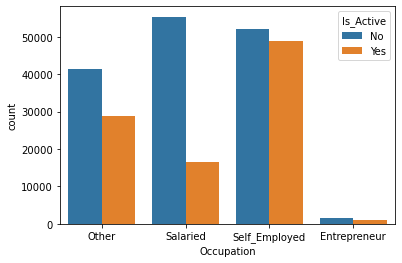

In [28]:
sns.countplot(data = train, x = 'Occupation', hue = 'Is_Active')
# Self_employed are the most active

<AxesSubplot:xlabel='Occupation', ylabel='count'>

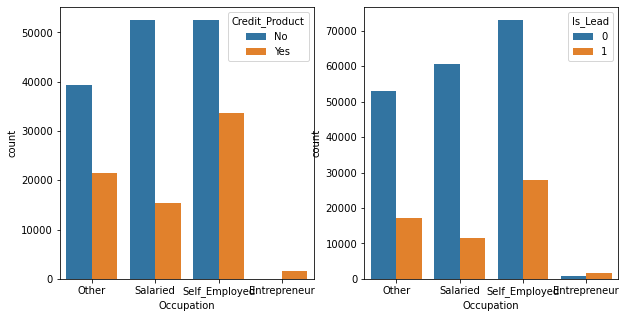

In [60]:
f,ax = plt.subplots(1,2, figsize = (10,5))
axx = ax.flatten()

sns.countplot(data = train, x = 'Occupation', hue = 'Credit_Product', ax = axx[0])
sns.countplot(data = train, x = 'Occupation', hue = target, ax = axx[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'RG268'),
  Text(1, 0, 'RG277'),
  Text(2, 0, 'RG270'),
  Text(3, 0, 'RG282'),
  Text(4, 0, 'RG261'),
  Text(5, 0, 'RG265'),
  Text(6, 0, 'RG283'),
  Text(7, 0, 'RG254'),
  Text(8, 0, 'RG269'),
  Text(9, 0, 'RG257'),
  Text(10, 0, 'RG279'),
  Text(11, 0, 'RG280'),
  Text(12, 0, 'RG252'),
  Text(13, 0, 'RG284'),
  Text(14, 0, 'RG259'),
  Text(15, 0, 'RG281'),
  Text(16, 0, 'RG258'),
  Text(17, 0, 'RG266'),
  Text(18, 0, 'RG260'),
  Text(19, 0, 'RG274'),
  Text(20, 0, 'RG256'),
  Text(21, 0, 'RG275'),
  Text(22, 0, 'RG273'),
  Text(23, 0, 'RG267'),
  Text(24, 0, 'RG272'),
  Text(25, 0, 'RG251'),
  Text(26, 0, 'RG262'),
  Text(27, 0, 'RG264'),
  Text(28, 0, 'RG278'),
  Text(29, 0, 'RG276'),
  Text(30, 0, 'RG263'),
  Text(31, 0, 'RG250'),
  Text(32, 0, 'RG255'),
  Text(33, 0, 'RG253'),
  Text(34, 0, 'RG271')])

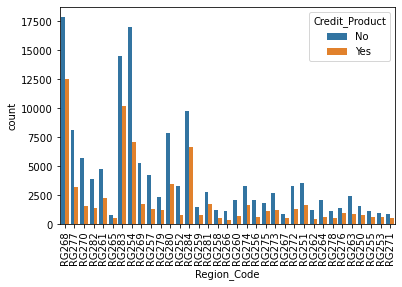

In [86]:
sns.countplot(data = train, x = 'Region_Code', hue = 'Credit_Product')
plt.xticks(rotation = 90)

In [ ]:
# [268,283,284,275,281,250,253,255,271]